In [3]:
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt

VolumetricData = pd.read_csv(r'C:\Users\abhar\Downloads\Volumetric_RegressionDataSet.csv')
VolumetricData.shape
VolumetricData.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [5]:
X = VolumetricData.drop(['Age'],axis = 1)
Y = VolumetricData.Age.values

In [88]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error  
from scipy.stats import gaussian_kde
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
pca1 = PCA(n_components=100)
pca1_data=pca1.fit_transform(X1)

labels = VolumetricData.columns.values.tolist()
label_index = [np.abs(pca1.components_[i]).argmax() for i in range(100)]
columns = [labels[label_index[i]] for i in range(100)]

pca_VolumetricData = pd.DataFrame(data=pca1_data, columns=columns)
pca_VolumetricData['Age'] = VolumetricData['Age']

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(pca_VolumetricData[columns], pca_VolumetricData['Age'], test_size=0.2)

In [91]:
#Linear Regression 
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train, Y_train)
Linear_Regression.predict(X_test)

meanabserror=metrics.mean_absolute_error(Y_test, Linear_Regression.predict(X_test))
print('The mean absolute error of this model, considering age is',meanabserror)
rootmeanabserror=math.sqrt(meanabserror)
print('The root mean absolute error of this model, considering age is',rootmeanabserror)
meansqrerror=metrics.mean_squared_error(Y_test, Linear_Regression.predict(X_test))
print('The mean square error of this model, considering age is', meansqrerror)
r2 = metrics.r2_score(Y_test, Linear_Regression.predict(X_test))
print('The r^2 value of the model is',r2)
print('The accuracy of this model is:', Linear_Regression.score(X_test,Y_test)*100,'%')

The mean absolute error of this model, considering age is 6.073662564083231
The root mean absolute error of this model, considering age is 2.464480181312731
The mean square error of this model, considering age is 59.27808885048152
The r^2 value of the model is 0.8457325332504702
The accuracy of this model is: 84.57325332504702 %


The testing accuracy for MLRM is:  0.8457325332504702
RMSE for Testing Data is:  7.699226509882763
The r^2 value of the model is 0.8457325332504702


C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


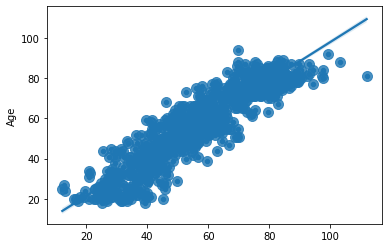

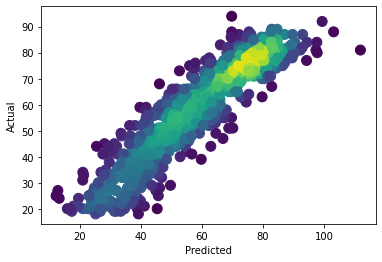

In [92]:
#Multiple Linear Regression
multiple_linear_reg = LinearRegression()
multiple_linear_reg.fit(X_train, Y_train)

y_pred_MLR_test = multiple_linear_reg.predict(X_test)

accuracy_MLR_test = r2_score(Y_test, y_pred_MLR_test)
print("The testing accuracy for MLRM is: ", accuracy_MLR_test)
RMSE_MLR_test = math.sqrt(mean_squared_error(Y_test, y_pred_MLR_test))
print("RMSE for Testing Data is: ", RMSE_MLR_test)
r2_MLR = metrics.r2_score(Y_test,y_pred_MLR_test)
print('The r^2 value of the model is',r2)

sns.scatterplot(y_pred_MLR_test,Y_test)
sns.regplot(y_pred_MLR_test ,Y_test, fit_reg=True, scatter_kws={"s": 100})

XY = np.vstack([y_pred_MLR_test,Y_test])
z = gaussian_kde(XY)(XY)
fig, ax = plt.subplots()
ax.scatter(y_pred_MLR_test,Y_test, c=z, s=100)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


MLPRegressor()
0.8003003560266783


C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


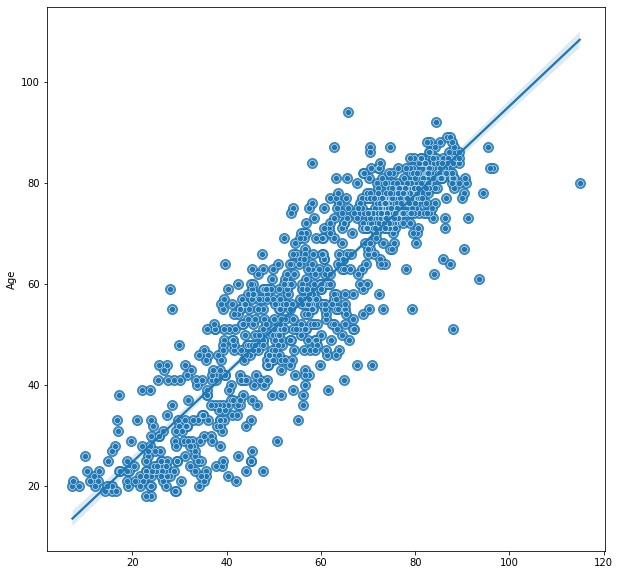

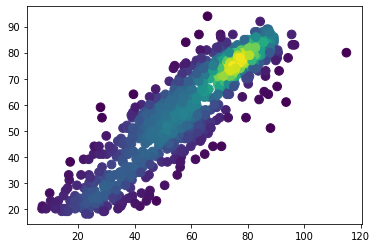

In [93]:
model = MLPRegressor()
model.fit(X_train, Y_train)
print(model)

model.predict(X_test)
print(metrics.r2_score(Y_test,model.predict(X_test)))
plt.figure(figsize=(10,10))
sns.regplot(model.predict(X_test),Y_test, fit_reg=True, scatter_kws={"s": 100})

sns.scatterplot(model.predict(X_test),Y_test)
XY2 = np.vstack([model.predict(X_test),Y_test])
z = gaussian_kde(XY2)(XY2)
fig, ax = plt.subplots()
ax.scatter(model.predict(X_test),Y_test, c=z, s=75)
plt.show()

In [94]:
DTree = tree.DecisionTreeRegressor()
DTree = DTree.fit(X_train, Y_train)
tree.plot_tree(DTree)

Exception ignored in: <bound method IteratorResourceDeleter.__del__ of <tensorflow.python.data.ops.iterator_ops.IteratorResourceDeleter object at 0x0000023002ADBAC8>>
Traceback (most recent call last):
  File "C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\data\ops\iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\ops\gen_dataset_ops.py", line 1263, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


[Text(175.58190255891571, 212.91, 'X[0] <= -0.731\nmse = 407.013\nsamples = 3380\nvalue = 58.437'),
 Text(105.41693233315077, 203.85, 'X[0] <= -4.548\nmse = 263.571\nsamples = 1645\nvalue = 43.447'),
 Text(63.54879647819311, 194.79, 'X[8] <= 0.568\nmse = 192.911\nsamples = 977\nvalue = 36.811'),
 Text(38.10330478061415, 185.73, 'X[134] <= -0.623\nmse = 128.305\nsamples = 684\nvalue = 32.512'),
 Text(20.645174800807744, 176.67, 'X[22] <= 0.277\nmse = 81.136\nsamples = 375\nvalue = 28.872'),
 Text(10.944299973660529, 167.60999999999999, 'X[130] <= 0.153\nmse = 102.523\nsamples = 190\nvalue = 31.605'),
 Text(4.319665159463553, 158.55, 'X[106] <= -0.882\nmse = 77.026\nsamples = 124\nvalue = 29.25'),
 Text(0.7642661164643649, 149.49, 'X[111] <= 0.272\nmse = 147.109\nsamples = 8\nvalue = 41.875'),
 Text(0.47031761013191686, 140.43, 'X[60] <= 0.318\nmse = 4.24\nsamples = 5\nvalue = 50.6'),
 Text(0.23515880506595843, 131.37, 'X[79] <= -0.619\nmse = 2.0\nsamples = 3\nvalue = 52.0'),
 Text(0.117

Error in callback <function flush_figures at 0x00000230627B9EA0> (for post_execute):


KeyboardInterrupt: 

The accuracy of this model is: 64.0826773451116 %


C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


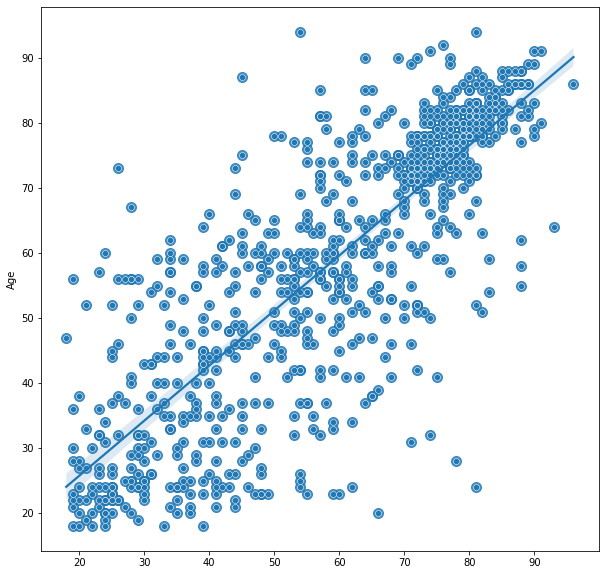

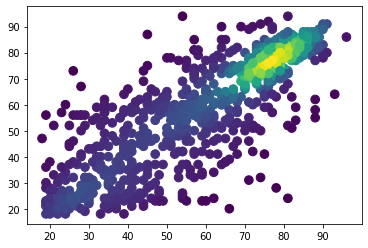

In [105]:
DTree = tree.DecisionTreeRegressor()
DTree = DTree.fit(X_train, Y_train)
DTree.predict(X_test)
print('The accuracy of this model is:', DTree.score(X_test,Y_test)*100, '%')

plt.figure(figsize=(10,10))
sns.regplot(DTree.predict(X_test),Y_test, fit_reg=True, scatter_kws={"s": 100})

sns.scatterplot(DTree.predict(X_test),Y_test)
XY2 = np.vstack([DTree.predict(X_test),Y_test])
z = gaussian_kde(XY2)(XY2)
fig, ax = plt.subplots()
ax.scatter(DTree.predict(X_test),Y_test, c=z, s=75)
plt.show()

In [106]:

# create ANN model
ANNmodel = Sequential()
ANNmodel.add(Dense(units=5, input_dim=190, kernel_initializer='normal', activation='relu'))
ANNmodel.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
ANNmodel.add(Dense(1, kernel_initializer='normal'))
ANNmodel.compile(loss='mean_squared_error', optimizer='adam')
ANNmodel.fit(X_train, Y_train ,batch_size = 20, epochs = 10, verbose=1)

#print('The accuracy of this model is:', ANNmodel.score(X_test,Y_test)*100, '%')
shawn = ANNmodel.predict(X_test)
print(shawn[0])
print(Y_test[0])

plt.figure(figsize=(10,10))
sns.regplot(ANNmodel.predict(X_test),Y_test, fit_reg=True, scatter_kws={"s": 100})

sns.scatterplot(ANNmodel.predict(X_test),Y_test)
XY2 = np.vstack([ANNmodel.predict(X_test),Y_test])
z = gaussian_kde(XY2)(XY2)
fig, ax = plt.subplots()
ax.scatter(ANNmodel.predict(X_test),Y_test, c=z, s=75)
plt.show()

Epoch 1/10
169/169 [==============================] - 1s 2ms/step - loss: 3727.9329
Epoch 2/10
169/169 [==============================] - 0s 3ms/step - loss: 3541.2776: 0s -
Epoch 3/10
169/169 [==============================] - 0s 3ms/step - loss: 3387.0891
Epoch 4/10
169/169 [==============================] - 0s 3ms/step - loss: 3261.3870
Epoch 5/10
169/169 [==============================] - 1s 3ms/step - loss: 3146.7217: 0s - loss: 3
Epoch 6/10
169/169 [==============================] - 1s 3ms/step - loss: 3038.5625
Epoch 7/10
169/169 [==============================] - 1s 4ms/step - loss: 2935.2305
Epoch 8/10
169/169 [==============================] - 1s 4ms/step - loss: 2835.8613
Epoch 9/10
169/169 [==============================] - 1s 3ms/step - loss: 2739.8413
Epoch 10/10
169/169 [==============================] - 1s 3ms/step - loss: 2646.9353
[11.202801]


KeyError: 0